In [41]:
import pandas as pd
import numpy as np
from astropy.table import Table

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 125

In [139]:
import seaborn as sns
sns.set_style('whitegrid')

In [140]:
from gal_data import gal_data

In [141]:
w1re = pd.read_csv('data/w1re.csv')
w2re =  pd.read_csv('data/w2re.csv')
w3re =  pd.read_csv('data/w3re.csv')
w4re =  pd.read_csv('data/w4re.csv')
nuvre=  pd.read_csv('data/nuvre.csv')
fuvre=  pd.read_csv('data/fuvre.csv')

w1re7p5 = pd.read_csv('data/w1re7p5.csv')
w2re7p5 =  pd.read_csv('data/w2re7p5.csv')
w3re7p5 =  pd.read_csv('data/w3re7p5.csv')
nuvre7p5=  pd.read_csv('data/nuvre7p5.csv')
fuvre7p5=  pd.read_csv('data/fuvre7p5.csv')

In [142]:
df = pd.read_csv('data/apertures_gauss15_all.csv')
cols = ['PGC', 'DIST_MPC','E_DIST_DEX','LOGMASS','E_LOGMASS','LOGSFR',
        'E_LOGSFR','METHOD_SFR','DELTAMS','T','MORPH','BAR','GALTYPE', 'GALTYPE_COURSE','R25_DEG']

In [143]:
df.PGC = ['PGC'+str(i) for i in df.PGC]

In [144]:
from astropy import units as u

In [145]:
w1re = w1re.merge(df[cols],on='PGC')
w1re['INCL_DEG']=gal_data(w1re.PGC)['INCL_DEG']
w1re['logre'] = np.log10(w1re.re)
mask = np.logical_and(w1re['INCL_DEG']<70., w1re['LOGMASS']>8.)
w1re=w1re[mask]

In [146]:
w2re = w2re.merge(df[cols],on='PGC')
w2re['INCL_DEG']=gal_data(w2re.PGC)['INCL_DEG']
w2re['logre'] = np.log10(w2re.re)
w2re=w2re[w2re['INCL_DEG']<70.]
mask = np.logical_and(w2re['INCL_DEG']<70., w2re['LOGMASS']>8.)
w2re=w2re[mask]

In [147]:
w3re = w3re.merge(df[cols],on='PGC')
w3re['INCL_DEG']=gal_data(w3re.PGC)['INCL_DEG']
w3re['logre'] = np.log10(w3re.re)
mask = np.logical_and(w3re['INCL_DEG']<70., w3re['LOGMASS']>8.)
w3re=w3re[mask]

In [148]:
w4re = w4re.merge(df[cols],on='PGC')
w4re['INCL_DEG']=gal_data(w4re.PGC)['INCL_DEG']
w4re['logre'] = np.log10(w4re.re)
mask = np.logical_and(w4re['INCL_DEG']<70., w4re['LOGMASS']>8.)
w4re=w4re[mask]

In [149]:
nuvre = nuvre.merge(df[cols],on='PGC')
nuvre['INCL_DEG']=gal_data(nuvre.PGC)['INCL_DEG']
nuvre['logre'] = np.log10(nuvre.re)
mask = np.logical_and(nuvre['INCL_DEG']<70., nuvre['LOGMASS']>8.)
nuvre=nuvre[mask]

In [150]:
fuvre = fuvre.merge(df[cols],on='PGC')
fuvre['INCL_DEG']=gal_data(fuvre.PGC)['INCL_DEG']
fuvre['logre'] = np.log10(fuvre.re)
mask = np.logical_and(fuvre['INCL_DEG']<70., fuvre['LOGMASS']>8.)
fuvre=fuvre[mask]

In [151]:
w1re['band'] = 'w1'
w2re['band'] = 'w2'
w3re['band'] = 'w3'
w4re['band'] = 'w4'
nuvre['band'] = 'nuv'
fuvre['band'] = 'fuv'

w1re7p5['band'] = 'w1'
w2re7p5['band'] = 'w2'
w3re7p5['band'] = 'w3'
nuvre7p5['band'] = 'nuv'
fuvre7p5['band'] = 'fuv'

In [152]:
allre = pd.concat([w1re,w2re,w3re,w4re,nuvre,fuvre],ignore_index=True)
allre7p5 = pd.concat([w1re7p5,w2re7p5,w3re7p5,nuvre7p5,fuvre7p5],ignore_index=True)


In [153]:
allre7p5

,PGC,re,amp,n,band
0,PGC100031,NaN,NaN,NaN,w1
1,PGC100035,11.982,0.7675250110645039,0.695,w1
2,PGC100042,11.683,0.9591969311492625,1.267,w1
3,PGC100050,NaN,NaN,NaN,w1
4,PGC100060,10.815,0.9487950726023945,0.848,w1
...,...,...,...,...,...
77200,PGC9987,NaN,NaN,NaN,fuv
77201,PGC9988,NaN,NaN,NaN,fuv
77202,PGC998846,47.969,0.002068770128522736,1.804,fuv
77203,PGC9991,NaN,NaN,NaN,fuv


count    7136.000000
mean        3.835770
std         3.498363
min         0.199634
25%         1.917742
50%         2.850182
75%         4.555784
max        52.681395
Name: rekpc, dtype: float64

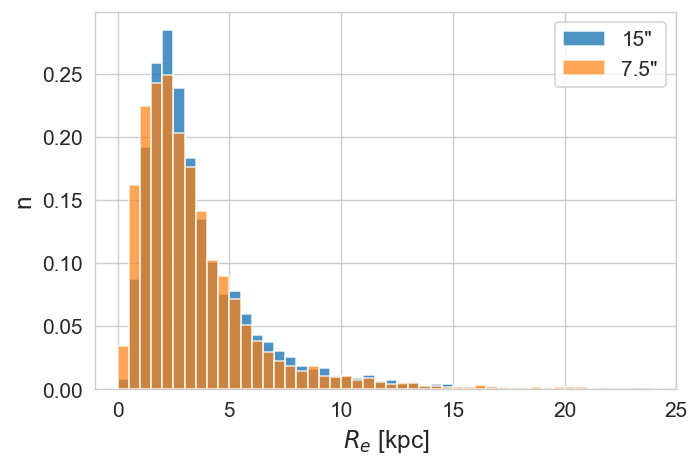

In [154]:
allre['rekpc'] = (allre.re*.5)*u.arcsec.to(u.radian)*allre.DIST_MPC*1000
allre7p5['rekpc'] = (allre7p5.re*.8)*u.arcsec.to(u.radian)*allre.DIST_MPC*1000
nonresmask = allre.re<15
#allre['rekpc']-=2
#allre[allre.rekpc>=3.].rekpc-=2
mask15 = allre.band=='w1'
mask7p5 = allre7p5.band=='w1'

allre['logrekpc'] = np.log10(allre.rekpc)
bins= np.arange(-1,50,.5)
allre[mask15].rekpc.hist(bins=bins,alpha=0.8,label='15"',density=True)
allre7p5[mask7p5].rekpc.hist(bins=bins,alpha=0.7,label='7.5"',density=True)

plt.xlim(-1,25)
plt.xlabel(r'$R_e$ [kpc]')
plt.ylabel('n')
plt.legend()
#plt.savefig('plots/rekpc_7p5v15_w1.png',bbox_inches='tight')
allre[allre.band=='w1'].rekpc.describe()


In [155]:
mmres = pd.read_csv('data/mmres_placeholder_w1_w2__w3_w4_fuv.csv')
(mmres.col2*u.arcsec.to(u.radian)*mmres.DIST_MPC*1000).describe()

count    2312.000000
mean        2.818802
std         1.428133
min         0.131336
25%         1.778297
50%         2.604150
75%         3.601002
max        11.271142
dtype: float64

In [156]:
from astropy import constants as c

In [157]:
def singleCompFunc(m,a,b):
    return(a*(m**b))

def twoCompFunc(m,a,b,g,m0):
    return((g*(m)**a)*((1+((m)/m0))**(b-a)))

In [158]:
import pandasFunctions
w1vals = allre[mask15][['LOGMASS','rekpc','GALTYPE_COURSE','band']].dropna()
w1vals = w1vals[np.logical_and(w1vals.LOGMASS>8.5,w1vals.LOGMASS<11.5)]
w1vals=w1vals[w1vals.GALTYPE_COURSE=='LT']
w1vals=w1vals[w1vals.band=='w1']


In [159]:
w1vals

,LOGMASS,rekpc,GALTYPE_COURSE,band
0,9.800672,4.146950,LT,w1
1,10.064115,1.455546,LT,w1
2,9.966842,1.630422,LT,w1
4,9.978079,1.623703,LT,w1
5,9.214497,2.318203,LT,w1
...,...,...,...,...
8627,10.598717,2.152986,LT,w1
8630,9.412241,4.500149,LT,w1
8631,9.603892,6.253738,LT,w1
8634,10.015516,3.348089,LT,w1


In [165]:
mrange = np.arange(8.5,12,.1)
med = pandasFunctions.rollingmedainXY(w1vals,'LOGMASS',np.arange(8.5,11.5,.2))
med = med.dropna()

mad = pandasFunctions.rollingMADXY(w1vals,'LOGMASS',np.arange(8.5,11.5,.2))
mad = mad.dropna()

In [161]:
allre

,PGC,re,amp,n,DIST_MPC,E_DIST_DEX,LOGMASS,E_LOGMASS,LOGSFR,E_LOGSFR,...,BAR,GALTYPE,GALTYPE_COURSE,R25_DEG,INCL_DEG,logre,band,Unnamed: 0,rekpc,logrekpc
0,PGC100035,29.416,0.13171295077743927,1.471,58.156770,0.1088,9.800672,0.100409,-0.027814,0.200030,...,,S,LT,0.006852,66.129997,1.468584,w1,NaN,4.146950,0.617729
1,PGC100042,16.768,0.7531307973317227,0.783,35.809635,0.1772,10.064115,0.101657,-1.838010,0.252919,...,,S,LT,0.009179,47.630001,1.224481,w1,NaN,1.455546,0.163026
2,PGC100060,16.374,0.4646861221381624,0.866,41.077145,0.1532,9.966842,0.123540,-0.319898,0.200067,...,,S,LT,0.004643,55.529999,1.214155,w1,NaN,1.630422,0.212300
3,PGC10008,18.040,0.8368821060039626,0.922,58.748943,0.1080,10.670687,0.100009,-0.653858,0.201249,...,,L,ET,0.010835,66.790001,1.256237,w1,NaN,2.569103,0.409781
4,PGC100097,12.404,0.43916030323001887,0.639,54.000767,0.1212,9.978079,0.145226,NaN,-1.691120,...,,S,LT,0.003688,55.860001,1.093562,w1,NaN,1.623703,0.210507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51829,PGC9972,30.081,0.01019137102165609,0.363,54.600956,0.1164,10.015516,0.100243,-0.194546,0.200108,...,B,S,LT,0.008726,50.790001,1.478292,fuv,15432.0,3.981414,0.600037
51830,PGC9987,NaN,NaN,NaN,18.958330,0.3384,9.596017,0.144378,-1.366602,0.200399,...,,L,ET,0.013177,64.089996,NaN,fuv,15436.0,NaN,NaN
51831,PGC9988,NaN,NaN,NaN,33.000000,0.1250,10.372620,0.101956,-0.476408,0.200108,...,B,S,LT,0.016361,35.470001,NaN,fuv,15437.0,NaN,NaN
51832,PGC998846,24.778,0.007677634070984317,0.694,68.833530,0.0924,9.271615,0.103936,-0.393129,0.200453,...,,NaN,NaN,0.007777,61.580002,1.394066,fuv,15438.0,4.134387,0.616411


In [169]:
from scipy.optimize import curve_fit
nanmask = np.logical_and(np.logical_and(np.logical_and(~np.isnan(allre.LOGMASS),~np.isnan(allre.rekpc)),
                                         allre.band=='fuv'),allre.GALTYPE_COURSE == 'ET')
guess = np.array([20e-3, .15])

popt, pcov = curve_fit(singleCompFunc,10**allre.LOGMASS[nanmask],allre.rekpc[nanmask]
                        , p0=guess,bounds = (1e-3,[1e-1,0.5]))

guess = np.array([.14, .9,.13, 14e10])

popt2, pcov2 = curve_fit(twoCompFunc,10**allre.LOGMASS[nanmask],allre.rekpc[nanmask]
                        , p0=guess
                        
                         ,bounds = ([1e-1,.5,1e-1,1e10],[.2,1,.5,5e11])
                      )
#w1vals
popt,popt2

#0.14,0.91,0.13,14e10

(array([0.01395936, 0.24705074]),
 array([1.11507083e-01, 9.99983552e-01, 3.25258368e-01, 3.46785485e+11]))

Text(0.5, 1.0, 'Single-Component Late Type W1/K-band')

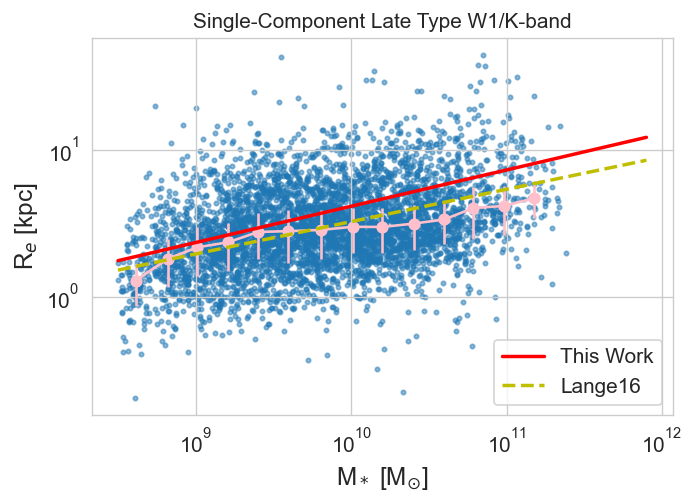

In [166]:
plt.loglog(10**w1vals.LOGMASS,w1vals.rekpc,'.',ms=5,alpha=0.5,zorder=0)
#plt.loglog(10**med.LOGMASS,med.rekpc,'*',ms=10,color='orange')
plt.errorbar(10**med.LOGMASS,med.rekpc,yerr = mad.rekpc,color='pink',marker='o',zorder=1)
plt.loglog(10**mrange,singleCompFunc(10**mrange,*popt),'r-',lw=2,label='This Work')
plt.loglog(10**mrange,(singleCompFunc(10**mrange,20.45e-3,0.22)),'y--',lw=2,label = 'Lange16')

plt.legend()
plt.xlabel(r'M$_*$ [M$_{\odot}$]')
plt.ylabel(r'R$_{e}$ [kpc]')
plt.title('Single-Component Late Type W1/K-band')
#plt.savefig('RekpcVM*_Lange_1comp.png',bbox_inches='tight')

Text(0.5, 1.0, 'Two-Component Late Type W1/K-band')

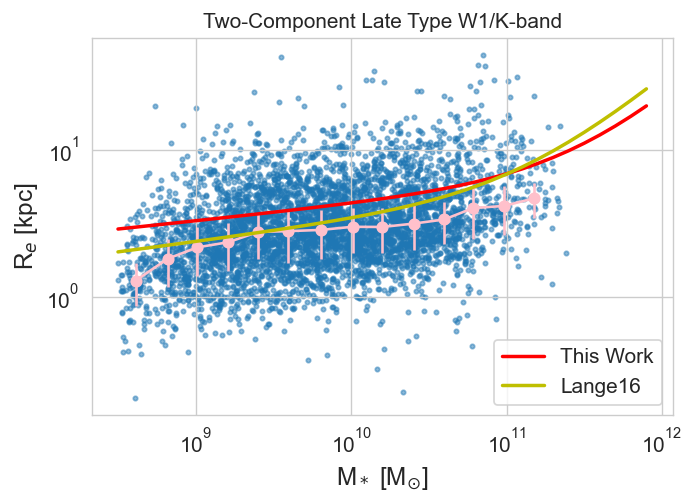

In [170]:
plt.loglog(10**w1vals.LOGMASS,w1vals.rekpc,'.',ms=5,alpha=0.5,zorder=0)
#plt.loglog(10**med.LOGMASS,med.rekpc,'*',ms=10,color='orange')
plt.errorbar(10**med.LOGMASS,med.rekpc,yerr = mad.rekpc,color='pink',marker='o',zorder=1)

plt.loglog(10**mrange,twoCompFunc(10**mrange,*popt2),'r',lw=2,label='This Work')
plt.loglog(10**mrange,(twoCompFunc(10**mrange,0.14,0.91,0.13,14e10)),'y',lw=2,label = 'Lange16')

plt.legend()
plt.xlabel(r'M$_*$ [M$_{\odot}$]')
plt.ylabel(r'R$_{e}$ [kpc]')
plt.title('Two-Component Late Type W1/K-band')
#plt.savefig('RekpcVM*_Lange.png',bbox_inches='tight')

In [72]:
w1vals = allre[mask15][['LOGMASS','rekpc','GALTYPE_COURSE','band']].dropna()
w1vals = w1vals[np.logical_and(w1vals.LOGMASS>8.5,w1vals.LOGMASS<11.5)]
w1vals=w1vals[w1vals.GALTYPE_COURSE=='ET']
w1vals=w1vals[w1vals.band=='w1']

med = pandasFunctions.rollingmedainXY(w1vals,'LOGMASS',np.arange(8.5,11.5,.2))
med = med.dropna()

mad = pandasFunctions.rollingMADXY(w1vals,'LOGMASS',np.arange(8.5,11.5,.2))
mad = mad.dropna()
mad

,LOGMASS,rekpc
LOGMASS,,
"(8.5, 8.7]",0.028628,0.344943
"(8.7, 8.9]",0.031374,0.590463
"(8.9, 9.1]",0.030636,0.449925
"(9.1, 9.3]",0.050032,0.889424
"(9.3, 9.5]",0.053453,0.779808
"(9.5, 9.7]",0.046052,0.834755
"(9.7, 9.9]",0.044729,0.945077
"(9.9, 10.1]",0.046585,1.241744
"(10.1, 10.3]",0.054701,1.209163


In [73]:
from scipy.optimize import curve_fit
mrange = np.arange(8.5,12,.1)
mask = np.logical_and(allre.band=='w1',allre.GALTYPE_COURSE=='ET')
mask = np.logical_and(mask,~nonresmask)
guess = np.array([2e-5, .48])

popt, pcov = curve_fit(singleCompFunc,10**med.LOGMASS,med.rekpc
                        ,sigma=1./mad.rekpc, p0=guess,bounds = (1e-5,[1e-1,0.5]))

guess = np.array([.14, .9,.13, 14e10])

popt2, pcov2 = curve_fit(twoCompFunc,10**med.LOGMASS,med.rekpc
                        , p0=guess
                        ,sigma=1./mad.rekpc
                         ,bounds = ([1e-1,.5,1e-1,1e10],[.2,1,.5,1e12])
                      )
#w1vals
popt,popt2

(array([0.02704559, 0.20072819]),
 array([1.44890964e-01, 5.00000000e-01, 1.00000000e-01, 3.28654880e+11]))

In [74]:
popt, pcov = curve_fit(twoCompFunc,10**w1vals.LOGMASS,w1vals.rekpc
                       ,bounds = ([0,0,0,1e10],[.2,1,.2,1e12]))
#w1vals
popt

array([1.43497858e-01, 6.30703770e-01, 1.38629205e-01, 3.05529264e+11])

In [75]:
w1allre = 

In [77]:
allre

,PGC,re,amp,n,DIST_MPC,E_DIST_DEX,LOGMASS,E_LOGMASS,LOGSFR,E_LOGSFR,...,BAR,GALTYPE,GALTYPE_COURSE,R25_DEG,INCL_DEG,logre,band,Unnamed: 0,rekpc,logrekpc
0,PGC100035,29.416,0.13171295077743927,1.471,58.156770,0.1088,9.800672,0.100409,-0.027814,0.200030,...,,S,LT,0.006852,66.129997,1.468584,w1,NaN,4.146950,0.617729
1,PGC100042,16.768,0.7531307973317227,0.783,35.809635,0.1772,10.064115,0.101657,-1.838010,0.252919,...,,S,LT,0.009179,47.630001,1.224481,w1,NaN,1.455546,0.163026
2,PGC100060,16.374,0.4646861221381624,0.866,41.077145,0.1532,9.966842,0.123540,-0.319898,0.200067,...,,S,LT,0.004643,55.529999,1.214155,w1,NaN,1.630422,0.212300
3,PGC10008,18.040,0.8368821060039626,0.922,58.748943,0.1080,10.670687,0.100009,-0.653858,0.201249,...,,L,ET,0.010835,66.790001,1.256237,w1,NaN,2.569103,0.409781
4,PGC100097,12.404,0.43916030323001887,0.639,54.000767,0.1212,9.978079,0.145226,NaN,-1.691120,...,,S,LT,0.003688,55.860001,1.093562,w1,NaN,1.623703,0.210507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51829,PGC9972,30.081,0.01019137102165609,0.363,54.600956,0.1164,10.015516,0.100243,-0.194546,0.200108,...,B,S,LT,0.008726,50.790001,1.478292,fuv,15432.0,3.981414,0.600037
51830,PGC9987,NaN,NaN,NaN,18.958330,0.3384,9.596017,0.144378,-1.366602,0.200399,...,,L,ET,0.013177,64.089996,NaN,fuv,15436.0,NaN,NaN
51831,PGC9988,NaN,NaN,NaN,33.000000,0.1250,10.372620,0.101956,-0.476408,0.200108,...,B,S,LT,0.016361,35.470001,NaN,fuv,15437.0,NaN,NaN
51832,PGC998846,24.778,0.007677634070984317,0.694,68.833530,0.0924,9.271615,0.103936,-0.393129,0.200453,...,,NaN,NaN,0.007777,61.580002,1.394066,fuv,15438.0,4.134387,0.616411


In [ ]:
    g = sns.FacetGrid(ltmelt,col='variable',col_wrap=2,height=2.75,aspect=1,sharex =True,sharey=True,hue = 'variable',palette=cs,despine=False)
    g.map_dataframe(sns.scatterplot,x='T',y='value',alpha=0.6,marker='.')
    axes = g.fig.axes
    for b in np.arange(len(bands)):
        axes[b].plot(med['T'],med[bands[b]],color=cs[b],lw=3)
    g.fig.subplots_adjust(wspace=0.05, hspace=0.05)
    g.add_legend()

    g._legend.set_title('')
    g.set_titles('')
    for lh in g._legend.legendHandles:
        lh.set_alpha(1)
        lh._sizes = [50]
    g.fig.text(x=0.5,y=0.05,horizontalalignment='center',s = r'T',fontsize=14)
    g.fig.text(x=0.05,y=0.5,verticalalignment='center',s = r'log($\nu$L$_{\nu}$ (2kpc) / $\nu$L$_{\nu}$ (R$_e$))',rotation=90,fontsize=14)
    
    plt.ylim(-3,2)
    g.fig.subplots_adjust(bottom=.1)
    g.fig.subplots_adjust(left=.15)
    plt.subplots_adjust(top=0.95)
        
    plt.savefig('/Users/kessler.363/Thesis/Concentrationz0mgs/plots/Concentration_T_scatter.png',bbox_inches='tight')
    plt.close('all')

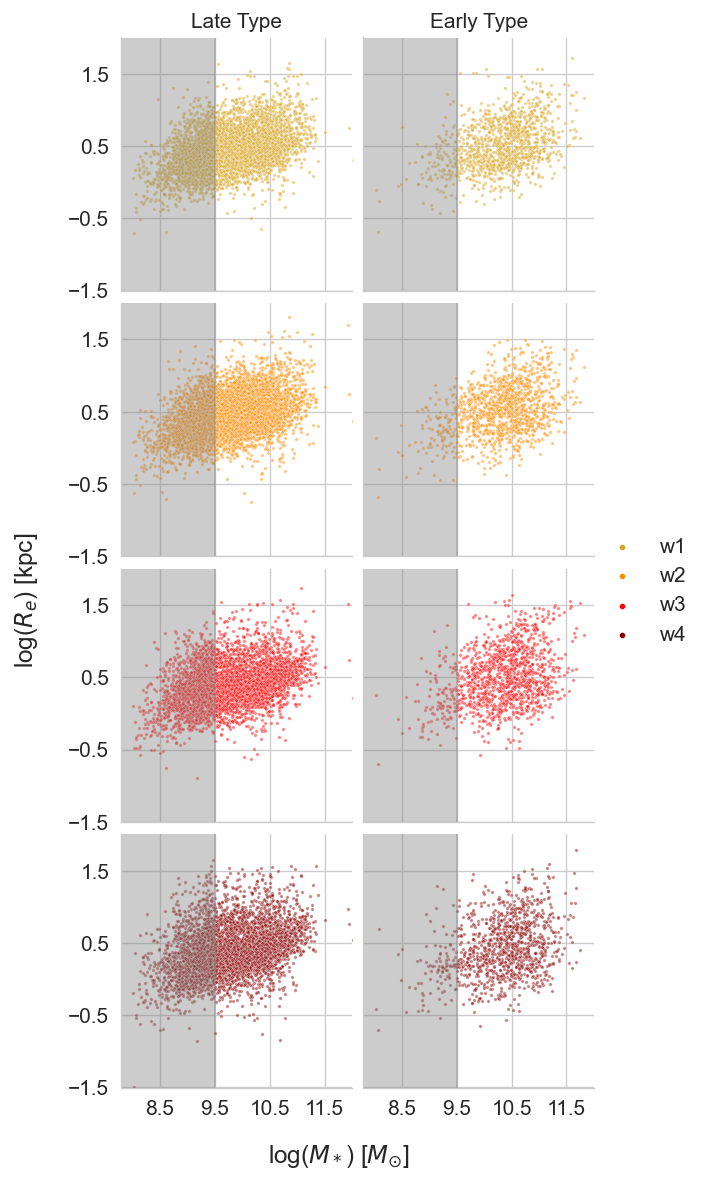

In [131]:
infre = allre[(allre['band']=='w1') | (allre['band']=='w2') | (allre['band']=='w3') | (allre['band']=='w4')].copy()

cs = ['goldenrod','darkorange','red','darkred']#,'dodgerblue','darkviolet']
g = sns.FacetGrid(infre, col="GALTYPE_COURSE",row="band", hue="band",palette=cs,height=2.5,aspect=1,sharex=True,sharey=True)
#g.map(sns.kdeplot, "LOGMASS", "logrekpc",zorder=0)
g.map(sns.scatterplot, "LOGMASS", "logrekpc",marker='.',alpha=0.5,s=15,label='band')
g.add_legend()

g._legend.set_title('')
g.set_titles('')
for lh in g._legend.legendHandles:
    lh.set_alpha(1)
    lh._sizes = [50]
    
plt.subplots_adjust(top=0.95)
axes = g.axes.flatten()

for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.fill_between(x=[7.5,9.5],y1=[-3],y2=[3],color='gray',alpha=0.4)   
    ax.set_xlim(7.8,12)
    ax.set_ylim(-1.5,2)
    ax.set_xticks([8.5,9.5,10.5,11.5])
    ax.set_yticks([-1.5,-0.5,0.5,1.5])

axes[0].set_title("Late Type")
axes[1].set_title("Early Type")

g.fig.text(x=0.5,y=0.05,horizontalalignment='center',s = r'log($M_*$) [$M_{\odot}$]',fontsize=14)
g.fig.text(x=0.05,y=0.5,verticalalignment='center',s = r'log($R_e$) [kpc]',rotation=90,fontsize=14)

g.fig.subplots_adjust(bottom=.11)
g.fig.subplots_adjust(left=.2)

#axes[1].set_xlabel('')
#axes[0].set_xlabel('')


g.fig.subplots_adjust(wspace=0.05, hspace=0.05)

#plt.savefig('plots/Re_scatter_infbands15.png',bbox_inches='tight')

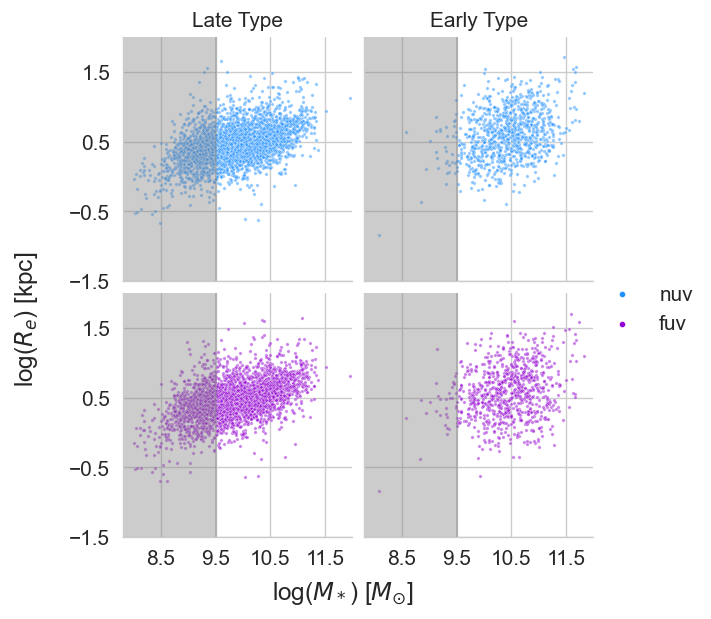

In [135]:
uvre = allre[(allre['band']=='nuv') | (allre['band']=='fuv')].copy()

cs = ['dodgerblue','darkviolet']
g = sns.FacetGrid(uvre, col="GALTYPE_COURSE",row="band", hue="band",palette=cs,height=2.5,aspect=1,sharex=True,sharey=True)
#g.map(sns.kdeplot, "LOGMASS", "logrekpc",zorder=0)
g.map(sns.scatterplot, "LOGMASS", "logrekpc",marker='.',alpha=0.5,s=15,label='band')
g.add_legend()

g._legend.set_title('')
g.set_titles('')
for lh in g._legend.legendHandles:
    lh.set_alpha(1)
    lh._sizes = [50]
    
plt.subplots_adjust(top=0.95)
axes = g.axes.flatten()

for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.fill_between(x=[7.5,9.5],y1=[-3],y2=[3],color='gray',alpha=0.4)   
    ax.set_xlim(7.8,12)
    ax.set_ylim(-1.5,2)
    ax.set_xticks([8.5,9.5,10.5,11.5])
    ax.set_yticks([-1.5,-0.5,0.5,1.5])

axes[0].set_title("Late Type")
axes[1].set_title("Early Type")

g.fig.text(x=0.5,y=0.05,horizontalalignment='center',s = r'log($M_*$) [$M_{\odot}$]',fontsize=14)
g.fig.text(x=0.05,y=0.5,verticalalignment='center',s = r'log($R_e$) [kpc]',rotation=90,fontsize=14)

g.fig.subplots_adjust(bottom=.15)
g.fig.subplots_adjust(left=.2)

#axes[1].set_xlabel('')
#axes[0].set_xlabel('')


g.fig.subplots_adjust(wspace=0.05, hspace=0.05)

plt.savefig('plots/Re_scatter_uvbands15.png',bbox_inches='tight')

<Figure size 1000x1000 with 0 Axes>

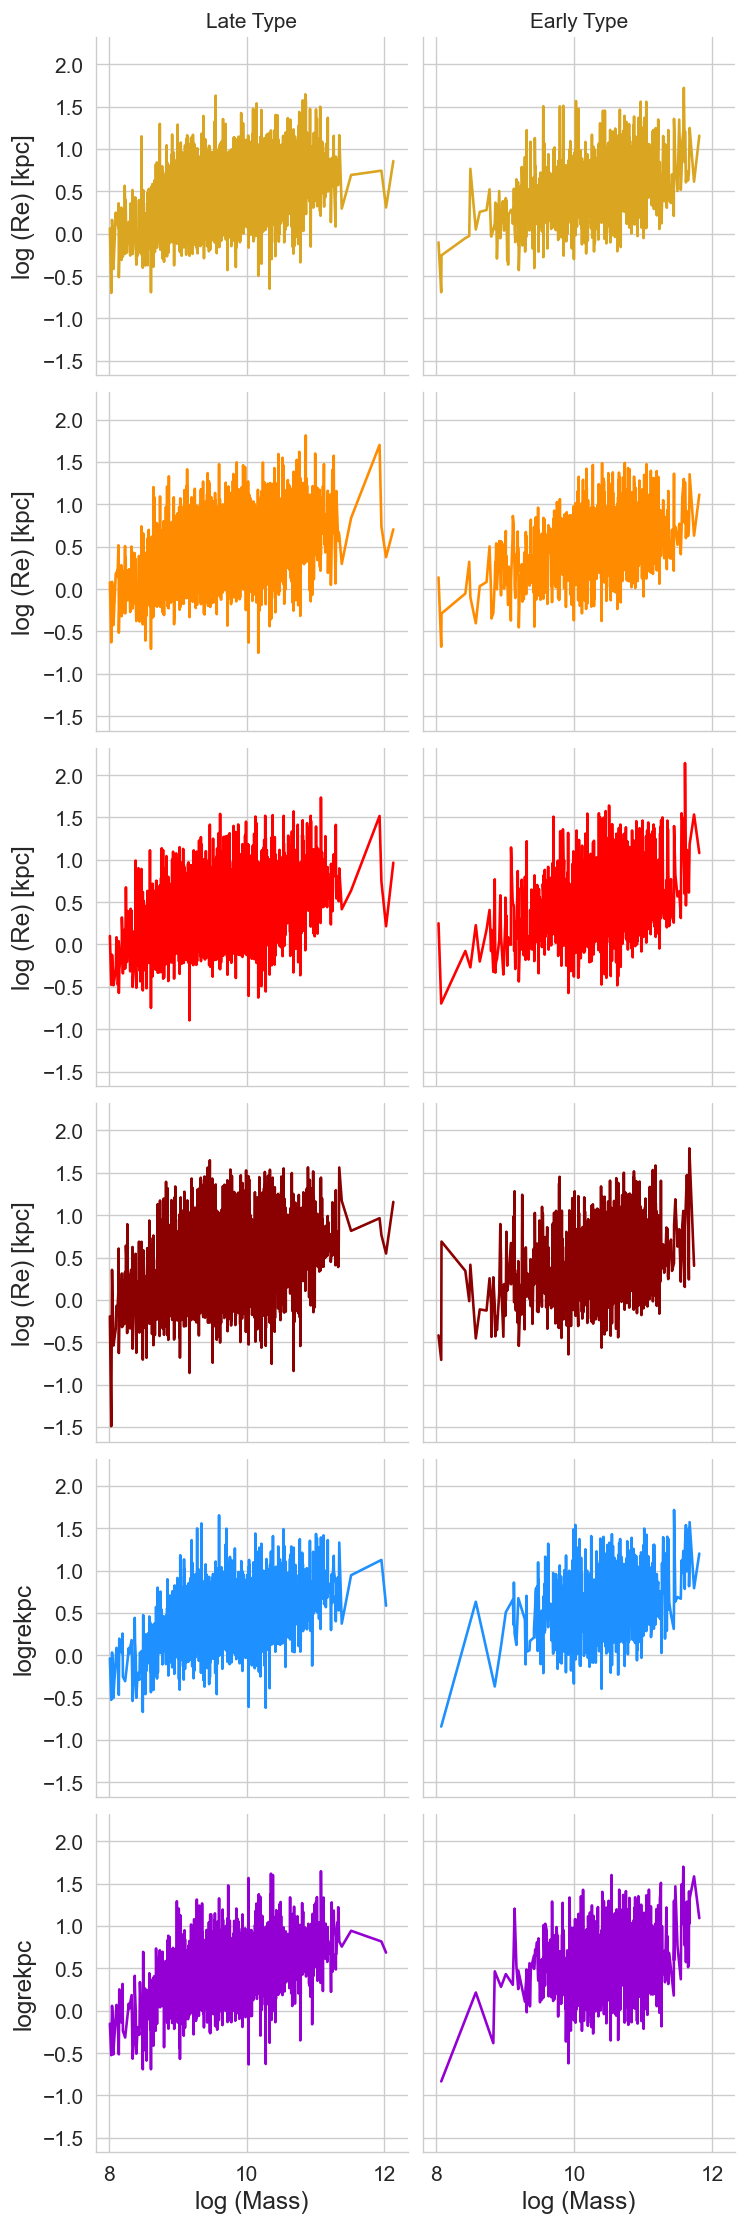

In [163]:
plt.figure(figsize = (8,8))
cs = ['goldenrod','darkorange','red','darkred','dodgerblue','darkviolet']
g = sns.FacetGrid(allre, col="GALTYPE_COURSE",row='band', hue="band",palette=cs)
g.map(sns.lineplot, "LOGMASS", "logrekpc",estimator=np.median)#,binwidth=(0.2,0.1),alpha=0.7)
g.set_titles('')
axes = g.axes.flatten()
axes[0].set_title("Late Type")
axes[1].set_title("Early Type")
#axes[1].set_xlabel('')
#axes[0].set_xlabel('')
axes[-1].set_xlabel('log (Mass)')
axes[-2].set_xlabel('log (Mass)')
axes[0].set_ylabel('log (Re) [kpc]')
axes[2].set_ylabel('log (Re) [kpc]')
axes[4].set_ylabel('log (Re) [kpc]')
axes[6].set_ylabel('log (Re) [kpc]')
#axes[8].set_ylabel('log (Re) [kpc]')
#axes[10].set_ylabel('log (Re) [kpc]')

g.fig.subplots_adjust(wspace=0.05, hspace=0.05)

#plt.savefig('plots/Re_2dhist_allbands15.png',bbox_inches='tight')


In [123]:
mask = np.logical_and(allre.band=='w1',allre.GALTYPE_COURSE==('LT'))

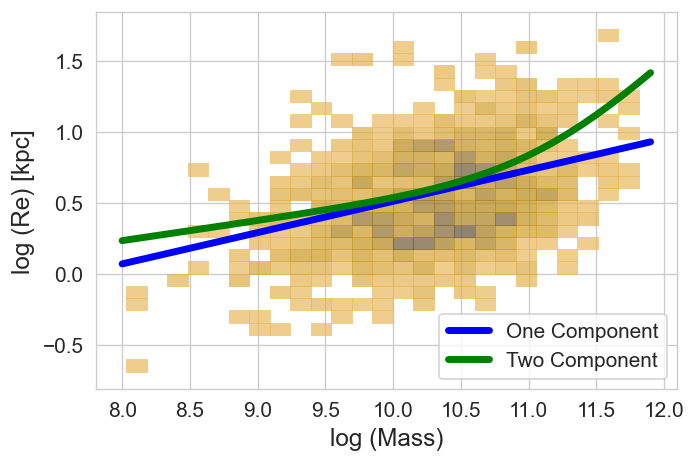

In [131]:
massarr = np.arange(8,12,.1)
sns.histplot(data=allre[mask],x='LOGMASS',y='logrekpc',color='goldenrod',alpha=0.7)
plt.plot(massarr,np.log10(singleCompFunc(10**massarr,20.45e-3,0.22)),lw=4,c='blue',label='One Component')

plt.plot(massarr,np.log10(twoCompFunc(10**massarr,0.14,0.91,0.13,14e10)),lw=4,c='green',label='Two Component')
plt.legend(loc='lower right')

plt.xlabel('log (Mass)')
plt.ylabel('log (Re) [kpc]')
plt.savefig('plots/masssize_lange16overplotted.png',bbox_inches='tight')

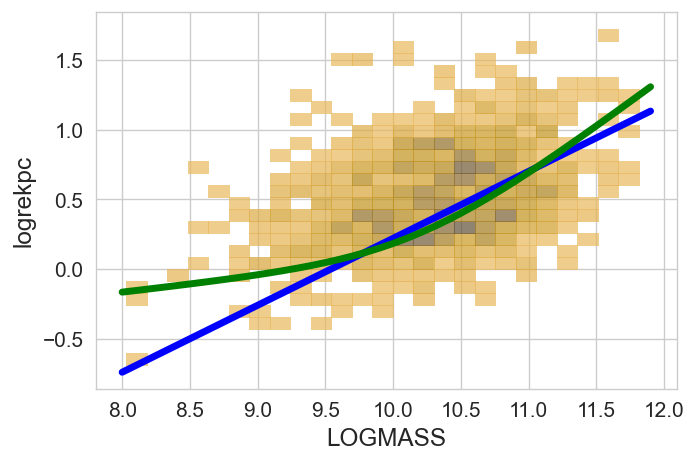

In [125]:
mask = np.logical_and(allre.band=='w1',allre.GALTYPE_COURSE==('ET'))
massarr = np.arange(8,12,.1)
sns.histplot(data=allre[mask],x='LOGMASS',y='logrekpc',color='goldenrod',alpha=0.7)
plt.plot(massarr,np.log10(singleCompFunc(10**massarr,2.64e-5,0.48)),lw=4,c='blue')

plt.plot(massarr,np.log10(twoCompFunc(10**massarr,0.11,0.72,0.09,1.57e10)),lw=4,c='green')


In [104]:
di = Table.read('data/delivery_index_gauss15.fits').to_pandas()
di.PGC_NAME=di.PGC_NAME.str.decode('utf-8')
di.PGC_NAME = [i.strip() for i in di.PGC_NAME]

In [98]:
w1pkl = pd.read_pickle('radprofilepkls1/W1_radprofiles.pkl')

In [99]:
w1pkl[:5]

,r_arcsec,I,Norm_I,gal
0,2.501307,0.303378,0.009883,PGC56796
1,5.620195,0.263937,0.018481,PGC56796
2,7.025627,0.257195,0.026859,PGC56796
3,7.510656,0.229316,0.034329,PGC56796
4,8.007439,0.255596,0.042655,PGC56796


In [105]:
w1di = w1pkl.merge(di[['PGC_NAME','STD_WISE1']],left_on='gal',right_on='PGC_NAME')

In [106]:
w1di.head()

,r_arcsec,I,Norm_I,gal,PGC_NAME,STD_WISE1
0,2.501307,0.303378,0.009883,PGC56796,PGC56796,0.066032
1,5.620195,0.263937,0.018481,PGC56796,PGC56796,0.066032
2,7.025627,0.257195,0.026859,PGC56796,PGC56796,0.066032
3,7.510656,0.229316,0.034329,PGC56796,PGC56796,0.066032
4,8.007439,0.255596,0.042655,PGC56796,PGC56796,0.066032


In [107]:
grouped = w1di.groupby('gal').mean()
sn = grouped['I']/grouped['STD_WISE1']

In [108]:
grouped['sn'] = sn

In [109]:
mmres = pd.read_csv('data/mmres_allotherstuff.csv')
mmres['PGCNAME'] = ['PGC'+str(i) for i in mmres.PGC]

In [110]:
mmres = mmres.merge(grouped[['sn']],left_on='PGCNAME',right_index=True)

In [111]:
grouped.index

Index(['PGC100031', 'PGC100035', 'PGC100042', 'PGC100050', 'PGC100060',
       'PGC100070', 'PGC100071', 'PGC10008', 'PGC100080', 'PGC1000913',
       ...
       'PGC996928', 'PGC9972', 'PGC997642', 'PGC998458', 'PGC9985', 'PGC9987',
       'PGC9988', 'PGC998846', 'PGC9991', 'PGC9993'],
      dtype='object', name='gal', length=15441)

In [112]:
bins = np.arange(-2,1,.1)

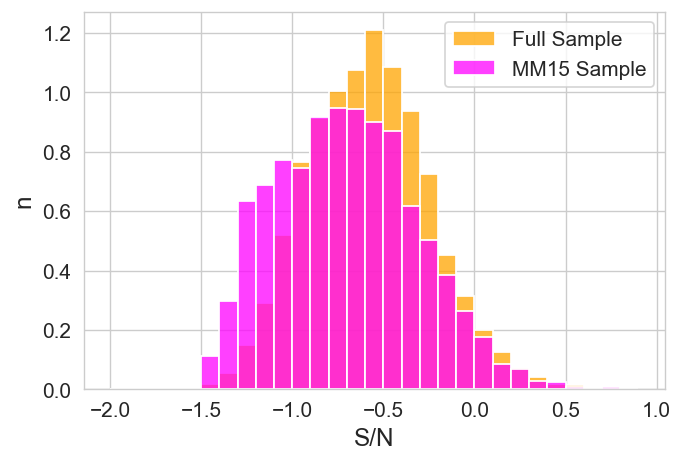

In [117]:
sns.histplot(np.log10(sn),bins = bins,color='orange',stat='density',label='Full Sample')
sns.histplot(np.log10(mmres.sn),bins=bins,color='magenta',stat='density',label='MM15 Sample')
plt.xlabel('S/N')
plt.ylabel('n')
plt.legend()
plt.savefig('plots/sn_compare_mm15fullsample.png',bbox_inches='tight')

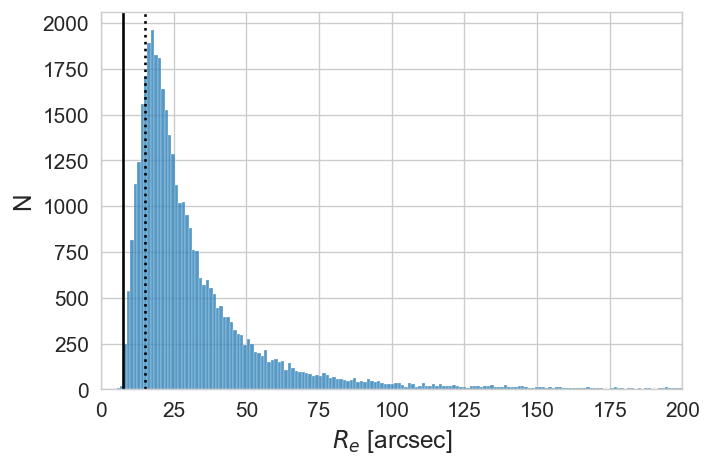

In [153]:
sns.histplot(allre.re)
plt.axvline(x=15,c='k',ls=':')
plt.axvline(x=7.5,c='k',ls='-')
plt.xlabel(r'$R_e$ [arcsec]')
plt.ylabel('N')
plt.xlim(0,200)
plt.savefig('plots/hist_Resample_res.png',bbox_inches='tight')

In [191]:
allre


,PGC,re,amp,n,DIST_MPC,E_DIST_DEX,LOGMASS,E_LOGMASS,LOGSFR,E_LOGSFR,...,BAR,GALTYPE,GALTYPE_COURSE,R25_DEG,INCL_DEG,logre,band,Unnamed: 0,rekpc,logrekpc
0,PGC100035,29.416,0.13171295077743927,1.471,58.156770,0.1088,9.800672,0.100409,-0.027814,0.200030,...,,S,LT,0.006852,66.129997,1.468584,w1,NaN,4.146950,0.617729
1,PGC100042,16.768,0.7531307973317227,0.783,35.809635,0.1772,10.064115,0.101657,-1.838010,0.252919,...,,S,LT,0.009179,47.630001,1.224481,w1,NaN,1.455546,0.163026
2,PGC100060,16.374,0.4646861221381624,0.866,41.077145,0.1532,9.966842,0.123540,-0.319898,0.200067,...,,S,LT,0.004643,55.529999,1.214155,w1,NaN,1.630422,0.212300
3,PGC10008,18.040,0.8368821060039626,0.922,58.748943,0.1080,10.670687,0.100009,-0.653858,0.201249,...,,L,ET,0.010835,66.790001,1.256237,w1,NaN,2.569103,0.409781
4,PGC100097,12.404,0.43916030323001887,0.639,54.000767,0.1212,9.978079,0.145226,NaN,-1.691120,...,,S,LT,0.003688,55.860001,1.093562,w1,NaN,1.623703,0.210507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51829,PGC9972,30.081,0.01019137102165609,0.363,54.600956,0.1164,10.015516,0.100243,-0.194546,0.200108,...,B,S,LT,0.008726,50.790001,1.478292,fuv,15432.0,3.981414,0.600037
51830,PGC9987,NaN,NaN,NaN,18.958330,0.3384,9.596017,0.144378,-1.366602,0.200399,...,,L,ET,0.013177,64.089996,NaN,fuv,15436.0,NaN,NaN
51831,PGC9988,NaN,NaN,NaN,33.000000,0.1250,10.372620,0.101956,-0.476408,0.200108,...,B,S,LT,0.016361,35.470001,NaN,fuv,15437.0,NaN,NaN
51832,PGC998846,24.778,0.007677634070984317,0.694,68.833530,0.0924,9.271615,0.103936,-0.393129,0.200453,...,,NaN,NaN,0.007777,61.580002,1.394066,fuv,15438.0,4.134387,0.616411
